In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
#Read the file
df_plot = pd.read_csv(r'C:\Users\ShreyaB\Documents\Mitteilungen\data\Ratios.csv')

In [9]:
df_plot.head(5)

,col1,col2,col3,col4
0,1.0,5.454545,1.0,1.0
1,1.0,6.250000,4.0,1.0
2,4.0,5.111111,2.0,NaN
3,2.0,6.500000,1.0,NaN
4,1.0,7.600000,1.0,11.0


In [10]:
# Calculate the Means and Modes for each column
Means = df_plot.mean()
Modes = df_plot.agg(lambda x: pd.Series.mode(x)[0])

In [11]:
def create_violin_plot(df):
    fig, axes = plt.subplots(figsize=(12, 5)) #figsize
    my_pal = "Set2"  # You can define your palette here or
    my_pal = {"col1": "gray", "col2": "gray", "col3":"gray", "col4":"gray"} # set the colour of violin plot for each distribution

    sns.violinplot(ax=axes, data=df, bw='scott', palette=my_pal, linewidth=2, scale='width')
    axes.set_xticklabels(['Teague(2020)', 'Wolf(ST)', 'CV2014', 'USET(cycle 22-24)'], fontsize=20) #set the x_labels
    sns.set(style="whitegrid")
    plt.setp(axes.collections, alpha=1)

    plt.scatter(x=range(len(Means)), y=Means, c="lime", marker=',', s=100, alpha=0.9) #plot the Means
    plt.scatter(x=range(len(Modes)), y=Modes, marker='^', s=80, color='cyan') #plot the Modes
    
    for violin, alpha in zip(axes.collections[::2], [0.9, 0.9, 0.9, 0.9]): #Set the transparency
        violin.set_alpha(alpha)

    axes.set_ylim((-1, 20))
    plt.ylabel("Spots/Group", fontsize=20)
    plt.xlabel("Series Index", fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.2)

    return fig, axes

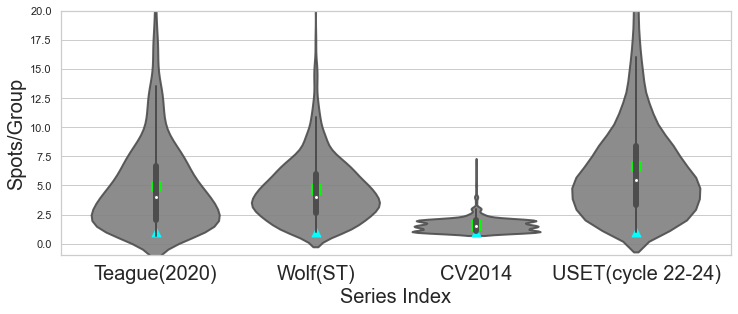

In [12]:
# Call the create_violin_plot function and pass your DataFrame as an argument
fig, axes = create_violin_plot(df_plot)

# Display the plot
plt.show()